In [14]:
import urllib.request
import re

text_file = urllib.request.urlopen("https://www.gutenberg.org/files/84/84-0.txt")

data = text_file.read()

data_decode = data.decode('UTF-8-sig')
lines = re.split(r'\r\n',data_decode)

line_words_split_list = list(map(lambda x:re.split(r'\s',x),lines))
line_words_count_list =[]
letter_chapter_dict = {}
title_key = "head"
for line_i in line_words_split_list:
    LineWordsCounter = 0
    for word_i in line_i:
        if re.search(r'[a-zA-Z]',word_i):
            LineWordsCounter += 1
    if (re.match("Letter",line_i[0]) or re.match("Chapter",line_i[0])):
        title_key = "_".join(line_i[:2])
    if title_key not in letter_chapter_dict:
        letter_chapter_dict[title_key] = []
    letter_chapter_dict[title_key].append(line_i)
    line_words_count_list.append(LineWordsCounter)
#print(line_words_count_list)

In [15]:
import numpy as np
words_count_mean = np.mean(line_words_count_list)
words_count_std =np.std(line_words_count_list)
print("words per line, mean:{0:.3f},std:{1:.3f} ".format(words_count_mean,words_count_std))

words per line, mean:10.074,std:4.786 


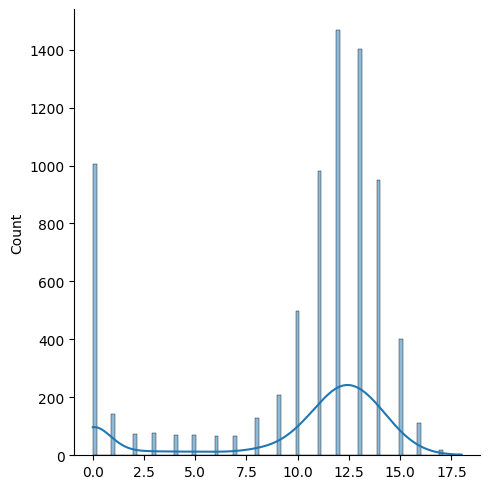

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(line_words_count_list, kde = True, bins = 100)

lines number is diffent between letters and chapters,Chapter_24 is longest,is 987
{'head': [], 'Letter_1': [], 'Letter_2': [], 'Letter_3': [14], 'Letter_4': [11, 18, 27, 32, 36, 38, 45, 92, 103, 118, 119], 'Chapter_1': [], 'Chapter_2': [], 'Chapter_3': [], 'Chapter_4': [], 'Chapter_5': [], 'Chapter_6': [], 'Chapter_7': [], 'Chapter_8': [], 'Chapter_9': [], 'Chapter_10': [12, 77, 81, 87, 97, 164, 204, 213], 'Chapter_11': [], 'Chapter_12': [], 'Chapter_13': [], 'Chapter_14': [], 'Chapter_15': [], 'Chapter_16': [], 'Chapter_17': [29, 122, 143], 'Chapter_18': [], 'Chapter_19': [], 'Chapter_20': [], 'Chapter_21': [], 'Chapter_22': [69], 'Chapter_23': [204], 'Chapter_24': [128, 144, 158, 183, 187, 202, 212, 228, 241, 249, 393, 415, 427, 442, 443, 475, 513, 517, 738, 774]}
45


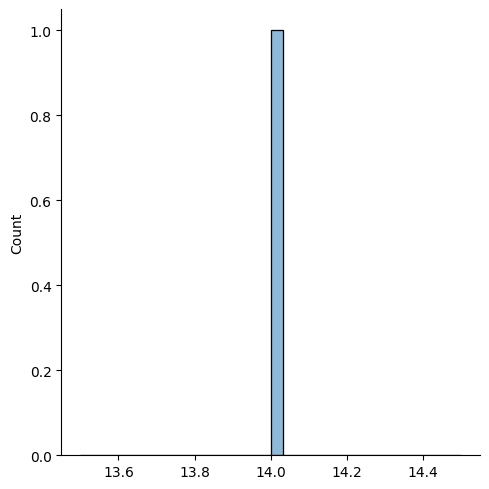

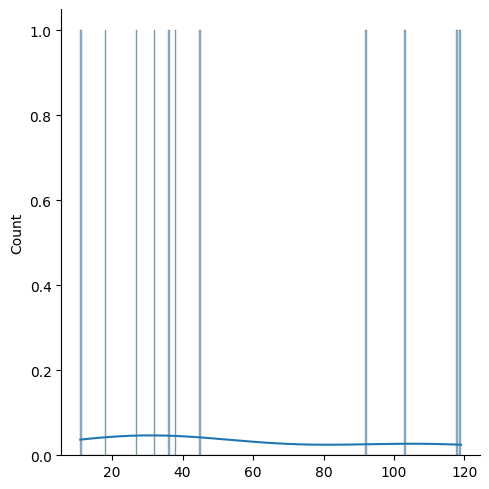

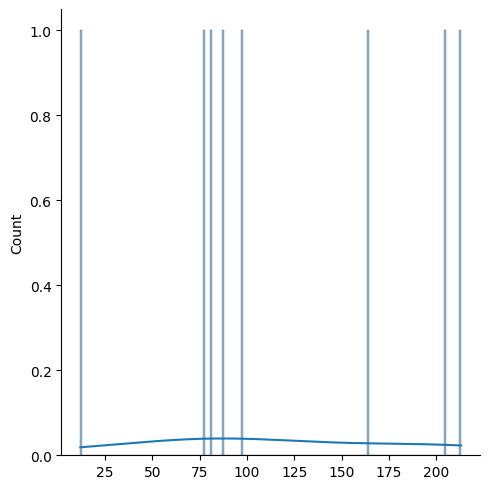

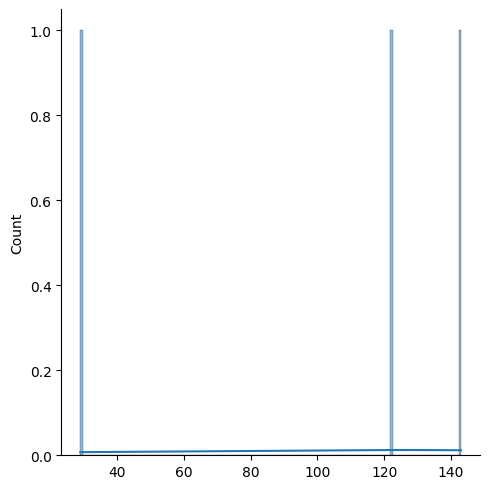

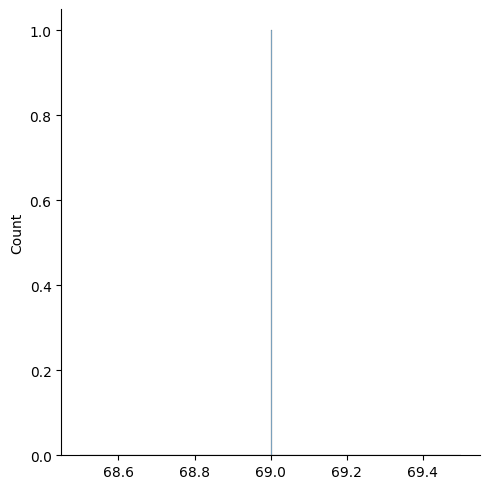

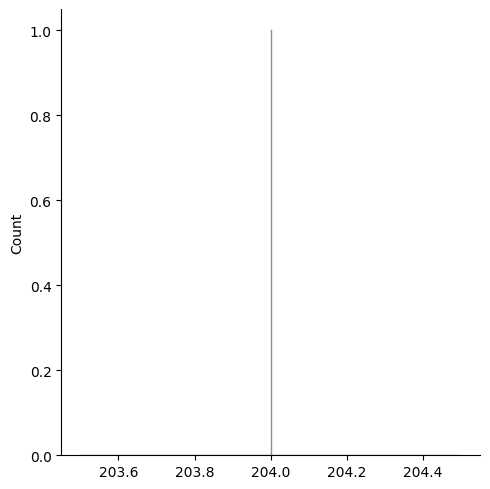

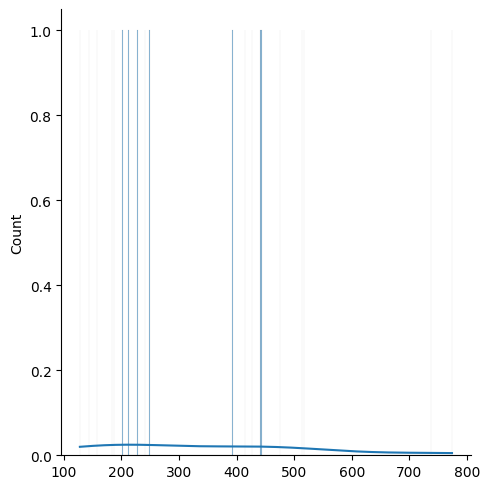

In [30]:
from functools import reduce
lette_chap_lines_dict = {}
lette_chap_ice_dict = {}
for lette_chap,content in letter_chapter_dict.items():
    lines_count = -1
    ice_line_list = []
    for content_i in range(len(content)):
        if not ("".join(content[content_i]) == ""):
            lines_count += 1
            for line_word_i in content[content_i]:
                if re.match(r'[^a-zA-Z]*ice[^a-zA-Z]*',line_word_i):
                    ice_line_list.append(content_i)
    lette_chap_lines_dict[lette_chap] = lines_count
    lette_chap_ice_dict[lette_chap] = ice_line_list
    if ice_line_list:
        sns.displot(ice_line_list, kde = True, bins = lines_count)
#print(lette_chap_lines_dict)
max_lines = max(lette_chap_lines_dict.values())
#print(max_lines)
max_letter_chapter = list(filter(lambda x:lette_chap_lines_dict[x]==max_lines,lette_chap_lines_dict))
print("lines number is diffent between letters and chapters,{0} is longest,is {1}".format(" ".join(max_letter_chapter),max_lines))
total_num_ice = reduce(lambda x,y:x+y,[len(i) for i in lette_chap_ice_dict.values()])
print(lette_chap_ice_dict)
print(total_num_ice)
        

    